In [1]:
#import bibliotek
from  keras.applications.resnet50 import ResNet50, decode_predictions,preprocess_input
from keras.preprocessing import image

import numpy as np
import requests
from io import BytesIO 
from PIL import Image

Using TensorFlow backend.


In [2]:
#podbranie modelu ResNet50
model = ResNet50(weights = 'imagenet')

In [3]:
#architektura modelu ResNet50
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## Import zdjecia z internetu
#wyświetla zdjecie w jupyterze



![] (link)


![](https://natgeo.imgix.net/syndication/d03e14b9-ccf2-40d2-9612-997a20d35b4a/magazine-rights-exempt-2016-08-departments-panda-mania-12.jpg?auto=compress,format&w=1024&h=560&fit=crop)

![](https://www.google.com/url?sa=i&source=imgres&cd=&cad=rja&uact=8&ved=2ahUKEwiFvvuM8MLhAhWHyKQKHSxsBEoQjRx6BAgBEAU&url=https%3A%2F%2Fwww.nationalgeographic.com.au%2Fanimals%2Fwho-discovered-the-panda.aspx&psig=AOvVaw2_1mzwUKFN5triJdvHotFY&ust=1554894652416632)

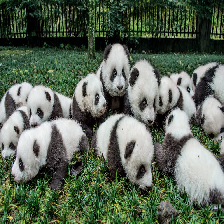

In [4]:
#import zdjecia z internetu
url_img = ('https://natgeo.imgix.net/syndication/d03e14b9-ccf2-40d2-9612-997a20d35b4a/magazine-rights-exempt-2016-08-departments-panda-mania-12.jpg?auto=compress,format&w=1024&h=560&fit=crop')

response = requests.get(url_img)

#zmiana na Bytes
img = Image.open(BytesIO(response.content))

#rozmiar zdjecia 224x 224 bo taki wymaga model
img = img.resize((224,224))
img


In [5]:
# konwersja zdjecia na tablice o wartosciach 0-255
X = image.img_to_array(img)

#dodanie nowego wymiaru bo model przyjmuje 4 wymiary
X = np.expand_dims(X, axis =0)

#(1,,224,224,3)
#   1 - zdjecie
# 224 - rozmiar
# 224 - rozmiar
#   3 - RBG
X.shape

(1, 224, 224, 3)

In [6]:
np.expand_dims(X, axis =0).shape

(1, 1, 224, 224, 3)

In [7]:
#predykcja
y_pred = model.predict(X)

In [8]:
#prawdopodobieństwo co jest na zdjęciu
decode_predictions(y_pred, top = 5)

[[('n01855672', 'goose', 0.42606738),
  ('n02110063', 'malamute', 0.07334919),
  ('n02095314', 'wire-haired_fox_terrier', 0.07258181),
  ('n01860187', 'black_swan', 0.036043514),
  ('n02104029', 'kuvasz', 0.035998926)]]

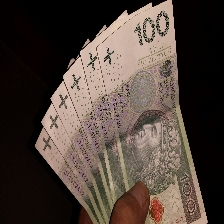

In [9]:
#inne przypadki
url_money =('http://3.bp.blogspot.com/-CU3Mg-LeVC4/VWSAi6Ff3dI/AAAAAAAAAkM/UnHJHUkba3c/s400/IMG_9240.JPG')
url_dolar =('https://s3.amazonaws.com/ngccoin-production/us-coin-explorer-category/2718362-020o.jpg')
url_kasa =('https://ocdn.eu/pulscms-transforms/1/MesktkpTURBXy82NDZmNjk1MTExMzVmN2Q5ZmMwMWE1YjUxODU5YzdkNC5qcGeSlQMAAM0QbM0JPZMFzQNSzQHe')
url_snow =('https://miastodzieci.pl/wp-content/uploads/2015/09/snowman-1073800_1920.jpg') 
url_dolares = ('https://wf2.xcdn.pl/files/17/04/12/984916_hI4O_17123251389_bed3c3a1ba_b_83.jpg')
url_cash = ('http://m.wm.pl/2018/07/orig/pieniadze-22-482228.jpg')

response = requests.get(url_cash)
img = Image.open(BytesIO(response.content))

#rozmiar zdjecia 224x 224
img = img.resize((224,224))
img

In [10]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis =0)
X.shape

(1, 224, 224, 3)

In [11]:
#predykcja
y_pred = model.predict(X)

In [12]:
#prawdopodobieństwo co jest na zdjęciu
decode_predictions(y_pred, top = 5)

[[('n03637318', 'lampshade', 0.18905205),
  ('n03485794', 'handkerchief', 0.16417311),
  ('n02869837', 'bonnet', 0.11841625),
  ('n03026506', 'Christmas_stocking', 0.057377316),
  ('n04325704', 'stole', 0.04867391)]]